# GOOGLE TRENDS

I'm going to compare the popularity in google of the words 'data science', 'big data' and 'data_analytics'. Let's see the data

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
gt = pd.read_csv('resources/google_trends.csv', skiprows=1)
gt.columns = ['weeks(ns)', 'data_science', 'big_data', 'data_analytics']
gt['weeks(ns)'] = pd.to_datetime(gt['weeks(ns)']).astype(np.int64)
gt.head()

,weeks(ns),data_science,big_data,data_analytics
0,1384041600000000000,14,64,16
1,1384646400000000000,14,65,17
2,1385251200000000000,11,57,13
3,1385856000000000000,15,59,16
4,1386460800000000000,14,58,14


In [3]:
gt.plot(y=['data_science', 'big_data', 'data_analytics'], x='weeks(ns)', kind='line', style='.', figsize=(20,10), title='Popularity in 5 years')

First of all the divition into train sets and test sets about words. And then do the model (linnear regresion) and calculate R² value

In [4]:
xtr_ds, xt_ds, ytr_ds, yt_ds =  train_test_split(gt['weeks(ns)'].values, gt['data_science'].values, test_size=0.3)
xtr_bd, xt_bd, ytr_bd, yt_bd =  train_test_split(gt['weeks(ns)'].values, gt['big_data'].values, test_size=0.3)
xtr_da, xt_da, ytr_da, yt_da =  train_test_split(gt['weeks(ns)'].values, gt['data_analytics'].values, test_size=0.3)

In [5]:
linr_ds = LinearRegression()
linr_ds.fit(np.asmatrix(xtr_ds).T, np.asmatrix(ytr_ds).T)
print('The linear regression for the popularity of data science in the last 5 years give a R²: ' '{:0.3}'.format(linr_ds.score(np.asmatrix(xtr_ds).T, np.asmatrix(ytr_ds).T)))

linr_bd = LinearRegression()
linr_bd.fit(np.asmatrix(xtr_bd).T, np.asmatrix(ytr_bd).T)
print('The linear regression for the popularity of big data in the last 5 years give a R²: ' '{:0.3}'.format(linr_bd.score(np.asmatrix(xtr_bd).T, np.asmatrix(ytr_bd).T)))

linr_da = LinearRegression()
linr_da.fit(np.asmatrix(xtr_da).T, np.asmatrix(ytr_da).T)
print('The linear regression for the popularity of data analytics in the last 5 years give a R²: ' '{:0.3}'.format(linr_da.score(np.asmatrix(xtr_da).T, np.asmatrix(ytr_da).T)))

The linear regression for the popularity of data science in the last 5 years give a R²: 0.939
The linear regression for the popularity of big data in the last 5 years give a R²: 0.22
The linear regression for the popularity of data analytics in the last 5 years give a R²: 0.936


Now, I'm going to calcuate the predicted line through the weeks to see how is the tend

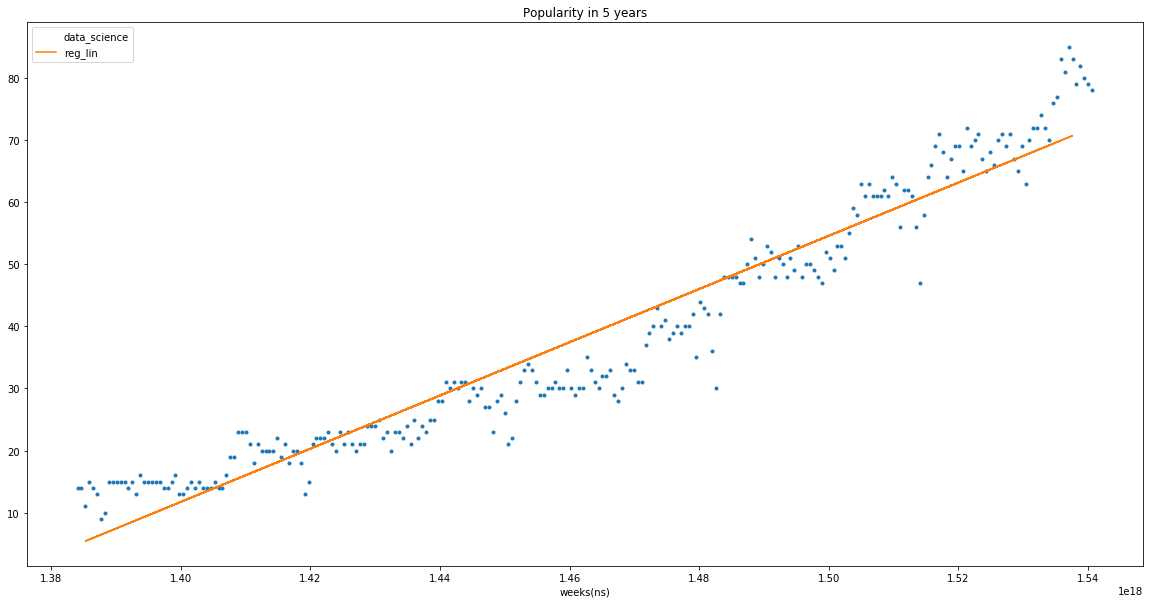

In [6]:
ax_ds = gt.plot(y='data_science', x='weeks(ns)', kind='line', style='.', figsize=(20,10), title='Popularity in 5 years')
yds_new = linr_ds.predict(np.asmatrix(xt_ds).T)
df_ds_pred = pd.DataFrame(data={'weeks(ns)': xt_ds, 'reg_lin':yds_new.flatten()})
df_ds_pred.plot(ax=ax_ds, x='weeks(ns)', y='reg_lin', kind='line')

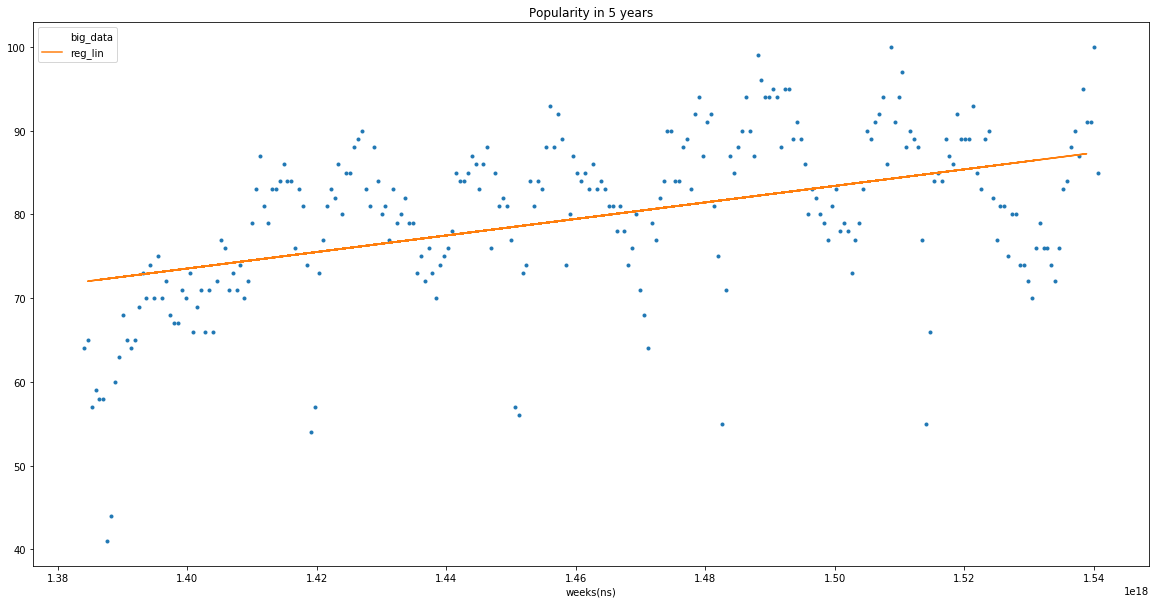

In [7]:
ax_bd = gt.plot(y='big_data', x='weeks(ns)', kind='line', style='.', figsize=(20,10), title='Popularity in 5 years')
ybd_new = linr_bd.predict(np.asmatrix(xt_bd).T)
df_bd_pred = pd.DataFrame(data={'weeks(ns)': xt_bd, 'reg_lin':ybd_new.flatten()})
df_bd_pred.plot(ax=ax_bd, x='weeks(ns)', y='reg_lin', kind='line')

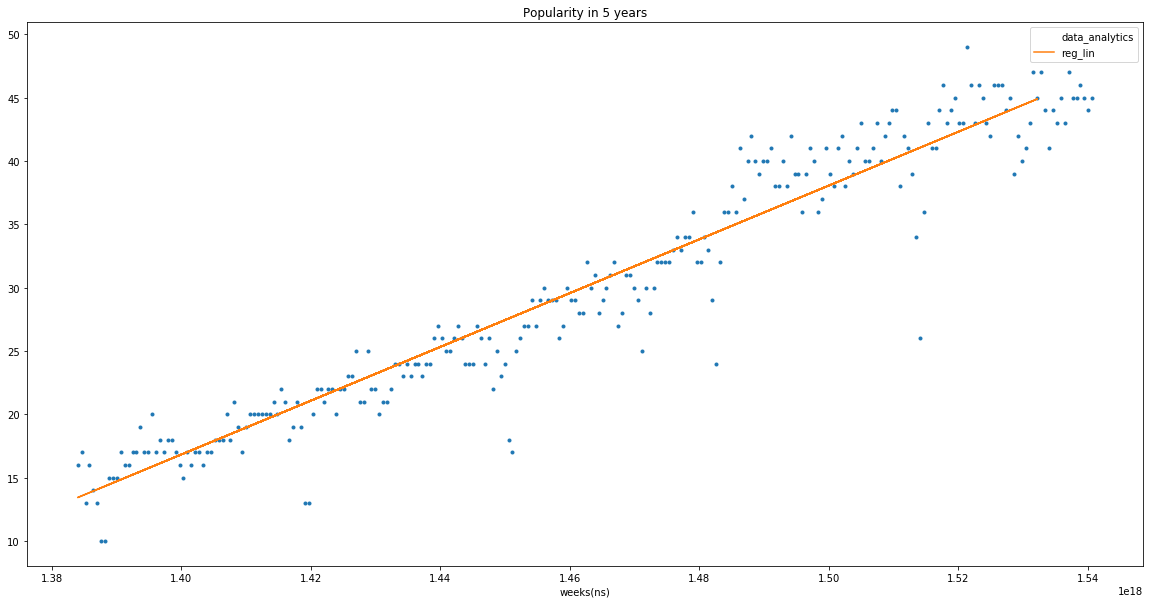

In [8]:
ax_da = gt.plot(y='data_analytics', x='weeks(ns)', kind='line', style='.', figsize=(20,10), title='Popularity in 5 years')
yda_new = linr_da.predict(np.asmatrix(xt_da).T)
df_da_pred = pd.DataFrame(data={'weeks(ns)': xt_da, 'reg_lin':yda_new.flatten()})
df_da_pred.plot(ax=ax_da, x='weeks(ns)', y='reg_lin', kind='line')

Now I'm going to show other models with the goal to comprobe whether a new model improve the precision about the data

In [9]:
random_ds = RandomForestRegressor()
random_ds.fit(np.asmatrix(xtr_ds).T, np.asmatrix(ytr_ds).T)
print('The random forest regression for the popularity of data science in the last 5 years give a R²: ' '{:0.3}'.format(random_ds.score(np.asmatrix(xtr_ds).T, np.asmatrix(ytr_ds).T)))

random_bd = RandomForestRegressor()
random_bd.fit(np.asmatrix(xtr_bd).T, np.asmatrix(ytr_bd).T)
print('The random forest regression for the popularity of big data in the last 5 years give a R²: ' '{:0.3}'.format(random_bd.score(np.asmatrix(xtr_bd).T, np.asmatrix(ytr_bd).T)))

random_da = RandomForestRegressor()
random_da.fit(np.asmatrix(xtr_da).T, np.asmatrix(ytr_da).T)
print('The random forest regression for the popularity of data analytics in the last 5 years give a R²: ' '{:0.3}'.format(random_da.score(np.asmatrix(xtr_da).T, np.asmatrix(ytr_da).T)))

The random forest regression for the popularity of data science in the last 5 years give a R²: 0.998
The random forest regression for the popularity of big data in the last 5 years give a R²: 0.935
The random forest regression for the popularity of data analytics in the last 5 years give a R²: 0.992


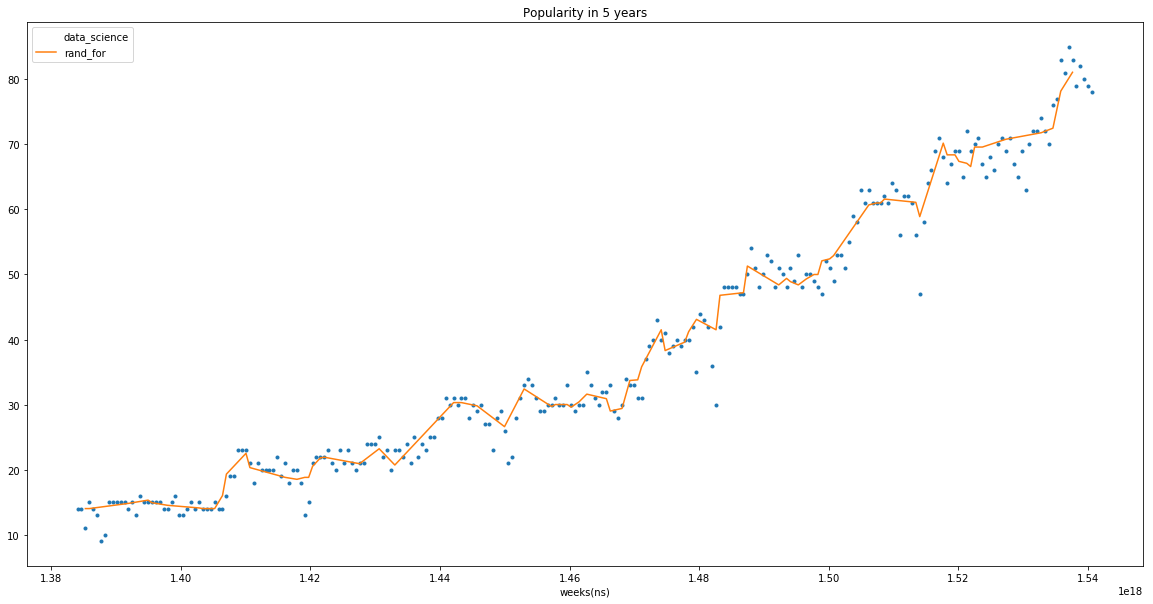

In [10]:
ax_ds = gt.plot(y='data_science', x='weeks(ns)', kind='line', style='.', figsize=(20,10), title='Popularity in 5 years')
yds_new = random_ds.predict(np.asmatrix(xt_ds).T)
df_ds_pred = pd.DataFrame(data={'weeks(ns)': xt_ds, 'rand_for':yds_new.flatten()})
df_ds_pred.sort_values('weeks(ns)', inplace=True)
df_ds_pred.plot(ax=ax_ds, x='weeks(ns)', y='rand_for', kind='line')

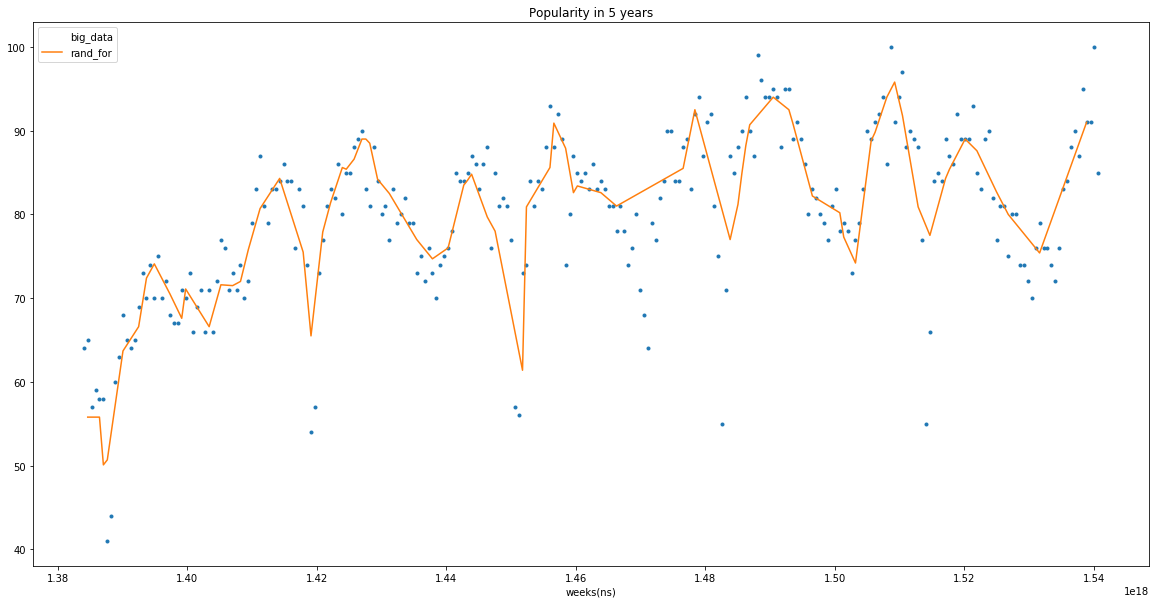

In [11]:
ax_bd = gt.plot(y='big_data', x='weeks(ns)', kind='line', style='.', figsize=(20,10), title='Popularity in 5 years')
ybd_new = random_bd.predict(np.asmatrix(xt_bd).T)
df_bd_pred = pd.DataFrame(data={'weeks(ns)': xt_bd, 'rand_for':ybd_new.flatten()})
df_bd_pred.sort_values('weeks(ns)', inplace=True)
df_bd_pred.plot(ax=ax_bd, x='weeks(ns)', y='rand_for', kind='line')

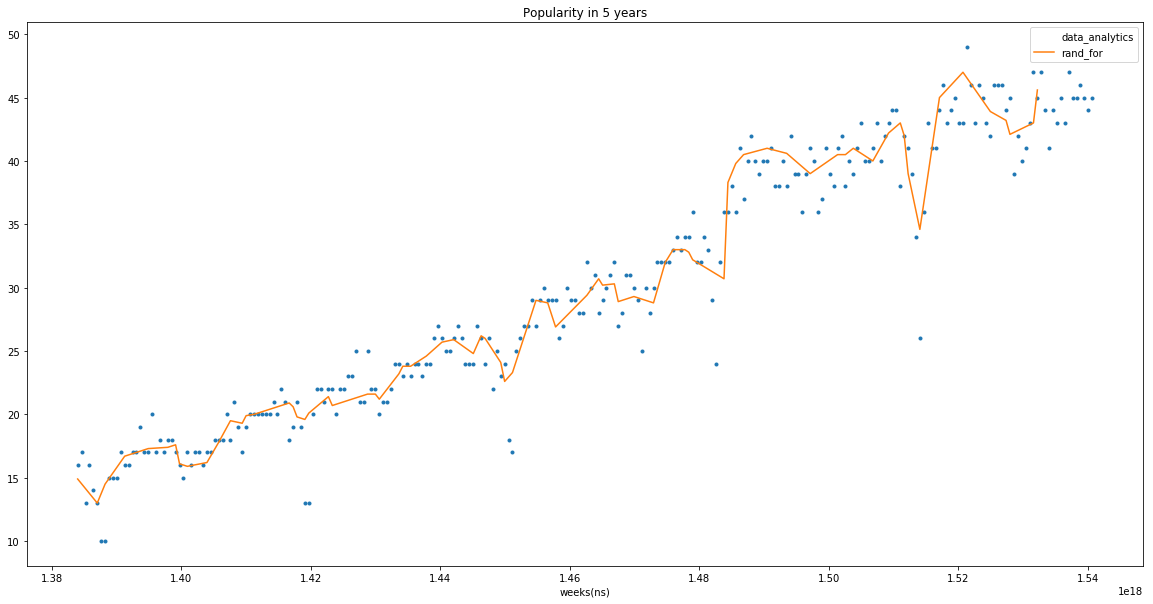

In [12]:
ax_da = gt.plot(y='data_analytics', x='weeks(ns)', kind='line', style='.', figsize=(20,10), title='Popularity in 5 years')
yda_new = random_da.predict(np.asmatrix(xt_da).T)
df_da_pred = pd.DataFrame(data={'weeks(ns)': xt_da, 'rand_for':yda_new.flatten()})
df_da_pred.sort_values('weeks(ns)', inplace=True)
df_da_pred.plot(ax=ax_da, x='weeks(ns)', y='rand_for', kind='line')

Random forest regression makes various regions in the x-axe and minimize the error to each region. This concept is related with the idea of leave in a tree.

### Cross Validation

Let's try to explain which model fits better with each set of data

In [13]:
#Linnear Regresion
ds_vs = cross_val_score(linr_ds, np.asmatrix(xtr_ds).T, np.asmatrix(ytr_ds).T, cv=5)
print('The R² value for data science with cross val for linnear model is: ' '{:0.3}'.format(ds_vs.mean()))
bd_vs = cross_val_score(linr_bd, np.asmatrix(xtr_bd).T, np.asmatrix(ytr_bd).T, cv=5)
print('The R² value for big data with cross val for linnear model is: ' '{:0.3}'.format(bd_vs.mean()))
da_vs = cross_val_score(linr_da, np.asmatrix(xtr_da).T, np.asmatrix(ytr_da).T, cv=5)
print('The R² value for data analytics with cross val for linnear model is: ' '{:0.3}'.format(da_vs.mean()))

#Random Forest Regression
ds_vs = cross_val_score(random_ds, np.asmatrix(xtr_ds).T, np.asmatrix(ytr_ds).T, cv=5)
print('The R² value for data science with cross val for random forest model is: ' '{:0.3}'.format(ds_vs.mean()))
bd_vs = cross_val_score(random_bd, np.asmatrix(xtr_bd).T, np.asmatrix(ytr_bd).T, cv=5)
print('The R² value for big data with cross val for random forest model is: ' '{:0.3}'.format(bd_vs.mean()))
da_vs = cross_val_score(random_da, np.asmatrix(xtr_da).T, np.asmatrix(ytr_da).T, cv=5)
print('The R² value for data analytics with cross val for random forest model is: ' '{:0.3}'.format(da_vs.mean()))

The R² value for data science with cross val for linnear model is: 0.929
The R² value for big data with cross val for linnear model is: 0.187
The R² value for data analytics with cross val for linnear model is: 0.93
The R² value for data science with cross val for random forest model is: 0.983
The R² value for big data with cross val for random forest model is: 0.63
The R² value for data analytics with cross val for random forest model is: 0.949


For the words 'data science' and 'data analytics' we could see that both models give an accuracy R² value although I will choose the linear regresion as the best because is simpler than random forest and second model could overfitting the data for both sets as we could see at the image.

On the other hand, for the word 'big data' we could (obviously) see that a linnear model never is going to fit so that is a bad approximation. For this reason for this set is properly the rando forest althoug it does not increase the accuracy as we could like.

This is a simple study about what model fits with the popularity of these words along 5 latest years. For a better study it will properly to study shorter periods of time to increase the model and to could give predictions in a short sight, but this is not the main goal of this notebook.

END